In [24]:
import cufflinks as cf
cf.go_offline()

In [2]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [3]:
N=file_len('shakespeare.txt')
# N=500
f=open("shakespeare.txt")
shakespeare =''
for i in xrange(N):
    line=f.next().strip()
    shakespeare += line+" "
f.close()

In [6]:
import string
string.punctuation
k= [x for x in string.punctuation+string.digits]
shakespeare = ''.join(c for c in shakespeare if c not in k)

In [7]:
import re
l = re.findall('([A-Z][A-Z\'-]+(?:\s+[A-Z\'-]+)+)', shakespeare)

In [8]:
summ=0
works = []
for x in l:
    if len(x) >4:
        works.append(x)

In [9]:
print len(works)
works

47


['MIDSUMMERNIGHTS DREAM  N',
 'II   W',
 'ALLS WELL THAT ENDS WELL  I',
 'DIANA CAPILET   I',
 'AS YOU LIKE IT  A',
 'CYMBELINE  Y',
 'LOVES LABOURS LOST  L',
 'DON ADRIANO DE ARMADO  T',
 'SPRING    I  W',
 'II   W',
 'WINTER    III   W',
 'IV  W',
 'MEASURE FOR MEASURE  E',
 'MUCH ADO ABOUT NOTHING  I',
 'PERICLES PRINCE OF TYRE   T',
 'THE COMEDY OF ERRORS  P',
 'THE MERCHANT OF VENICE   I',
 'THE MERRY WIVES OF WINDSOR  S',
 'THE TAMING OF THE SHREW   I',
 'THE TEMPEST  B',
 'THE TWO GENTLEMEN OF VERONA  C',
 'THE WINTERS TALE  I',
 'TROILUS AND CRESSIDA  I',
 'TWELFTHNIGHT OR WHAT YOU WILL   I',
 'THE FORTUNATEUNHAPPY   D',
 'THE MADLYUSED MALVOLIO   D',
 'THE FAMOUS HISTORY OF THE LIFE OF KING HENRY VIII   I',
 'THE FIRST PART OF KING HENRY IV  S',
 'THE FIRST PART OF KING HENRY VI  F',
 'THE LIFE AND DEATH OF KING JOHN  N',
 'THE LIFE OF KING HENRY V  C',
 'THE SECOND PART OF KING HENRY IV   O',
 'THE SECOND PART OF KING HENRY VI   A',
 'THE THIRD PART OF KING HENRY VI  I',
 'TH

In [10]:
alphabet=string.lowercase

In [11]:
ll=[]
for letter in alphabet:
    ll.append(letter)
ll.append(" ")

In [12]:
from itertools import product
pl=[]
for pair in product(ll, repeat=2):
    strng = pair[0]+pair[1]
    pl.append(strng)

In [13]:
import pandas as pd

In [14]:
transition_matrix = pd.DataFrame(index=pl, columns=pl)
transition_matrix.fillna(0, inplace=True)

In [15]:
# import string
# string.punctuation
# k= [x for x in string.punctuation]

In [16]:
shakespeare[:100]

'A MIDSUMMERNIGHTS DREAM  Now  fair Hippolyta  our nuptial hour Draws on apace  four happy days bring'

In [17]:
# shakespeare = ''.join(c for c in shakespeare if c not in k)
shakespeare = shakespeare.lower()

In [18]:
import re 
shakespeare = re.sub(' +', ' ', shakespeare)

In [19]:
len(shakespeare)

4114540

In [20]:
%%time
# may need to change  way i iterate through string
# i=0
for x in range(len(shakespeare)-4):
    transition_matrix.ix['{}'.format(shakespeare[x:x+2]),'{}'.format(shakespeare[x+2:x+4])] +=1

CPU times: user 19min 55s, sys: 680 ms, total: 19min 55s
Wall time: 19min 57s


In [21]:
transition_matrix
ntransition_matrix = transition_matrix.copy()

In [22]:
for x in ntransition_matrix:
    ntransition_matrix.ix[x] = ntransition_matrix.ix[x]/sum(ntransition_matrix.ix[x])
ntransition_matrix = ntransition_matrix[ntransition_matrix.sum(axis=1) != 0]

In [23]:
ntransition_matrix.fillna(0, inplace=True);ntransition_matrix

,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,...,r,s,t,u,v,w,x,y,z,
aa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0
ab,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000377,0.000000,...,0.000000,0.000000,0.002261,0.001884,0.000000,0.001130,0,0.000377,0.000000,0
ac,0.000000,0.000143,0.000000,0.000429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000143,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0
ad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000220,0.000000,0.000000,0.000000,...,0.012881,0.024001,0.064626,0.003963,0.001431,0.022680,0,0.011780,0.000000,0
ae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0
af,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001188,0.007126,0.000000,0.000000,0.000594,0,0.001188,0.000000,0
ag,0.000000,0.001211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317510,0.000000,...,0.000242,0.000484,0.004359,0.000484,0.000000,0.002422,0,0.000484,0.000000,0
ah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016901,0.067606,0.107042,0.002817,0.011268,0.146479,0,0.050704,0.000000,0
ai,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0,0.000000,0.000000,0
aj,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0


In [27]:
ntransition_matrix.to_csv("2-ngram_shakespeare_transition_matrix.csv")

In [25]:
ntransition_matrix.iplot(kind='heatmap')

In [22]:
# transition_matrix.transpose.ix[x].transpose()

In [23]:
# from ipywidgets import interact

# def plot_it2(kit):
#     ntransition_matrix.ix[kit].iplot(kind='bar', title='next letter frequency for "{}"'.format(kit))
    
# interact(plot_it2, kit=ntransition_matrix.columns.tolist())

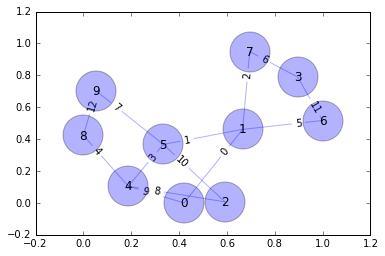

In [24]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='spring',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()

graph = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9),
         (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]

# you may name your edge labels
labels = map(chr, range(65, 65+len(graph)))
#draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
draw_graph(graph)

In [25]:
labels

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='spring',
               node_size=160, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    
    
    
    
    

    # extract nodes from graph
    nodes = set(ntransition_matrix.columns)

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for rows in ntransition_matrix.columns:
        for columns in ntransition_matrix.columns:
            G.add_edge(rows, columns)
            
            
    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)


#     nx.draw(G, pos)
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color, arrows=True)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    # show graph
    plt.figure(3,figsize=(12,12))
    plt.show()

# draw example
graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20)]
draw_graph(graph)

KeyboardInterrupt: 

In [ ]:
ntransition_matrix.ix['a', 'b']

In [ ]:
def list_of_sqrt(n=10):
    l=[]
    for i in range(n):
        l.append(sqrt(i))
    
    return l

In [ ]:
from multiprocessing import Pool
pool = Pool()

In [ ]:
string.ascii_uppercase